In [1]:
import pickle
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import seaborn as sns
from mnist import MNIST

# Getting the notions of effective rank described by Bartlet for the CIFAR-10 Dataset

### Bartlet - "r0(Σ) should be small compared to the sample size n (from the first term) and rk(Σ) and Rk(Σ) should be large compared to n."

In [2]:
# importing file 
with open('data_batch_1','rb') as fo:
    dict = pickle.load(fo, encoding='bytes')


In [10]:
# getting the labels from that file
data = dict[b'data']

data_t = np.transpose(data)

data = data.astype(float)
data_t = data_t.astype(float)

x = np.matmul(data_t,data)

(10000, 3072)


In [4]:
# computing the eigenvalues and vectors of that file
print(x.shape)
# data_cov = np.cov(data)
w, v = LA.eig(x)

(3072, 3072)


In [5]:
with open('cifar10_cov.npy', 'wb') as f:
    np.save(f, x)

In [6]:
w = np.sort(w)

w = w[::-1]
effective_rank_1 = np.zeros(w.size)
effective_rank_2 = np.zeros(w.size)

for i in range(len(w)):
    effective_rank_1[i] = np.sum(w[i:])/w[i]
    effective_rank_2[i] = (np.sum(w[i:])**2)/np.sum(w[i:]**2)

# Graphing eigen values

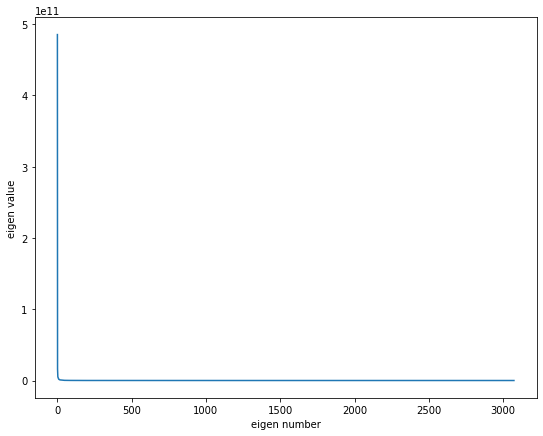

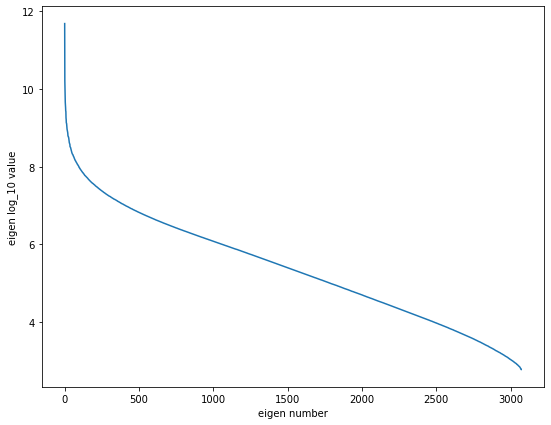

In [7]:
# making graphs of eigen values
counter = np.linspace(1,3072,3072)
plt.figure(figsize=(9,7))
sns.lineplot(x = counter, y = w)
plt.xlabel("eigen number")
plt.ylabel("eigen value")
plt.show()
plt.figure(figsize=(9,7))
log_w = np.log10(w)
sns.lineplot(x = counter, y = log_w)
plt.xlabel("eigen number")
plt.ylabel("eigen log_10 value")
plt.show()


# Graphing notions of effective rank

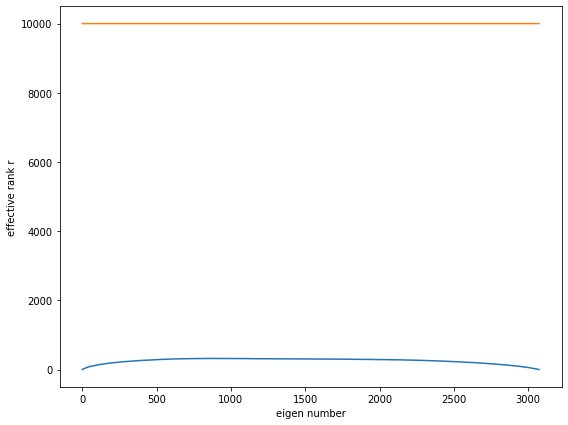

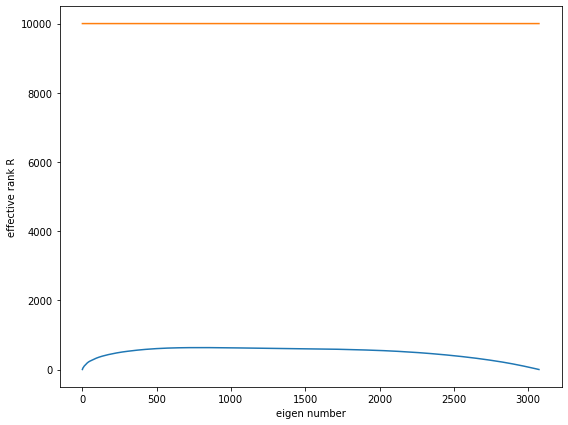

In [13]:
# n = data.shape[0]*np.ones(w.size)

# making graphs of eigen values
counter = np.linspace(1,w.size,w.size)
plt.figure(figsize=(9,7))
sns.lineplot(x = counter, y = effective_rank_1)
sns.lineplot(x = counter, y = n)
plt.xlabel("eigen number")
plt.ylabel("effective rank r")
plt.show()
plt.figure(figsize=(9,7))
log_w = np.log10(w)
sns.lineplot(x = counter, y = effective_rank_2)
sns.lineplot(x = counter, y = n)
plt.xlabel("eigen number")
plt.ylabel("effective rank R")
plt.show()

# Doing the same as above but for the MNIST Dataset

In [20]:
mndata = MNIST('mnist')

images_train, labels_train = mndata.load_training()
# or
images_test, labels_test = mndata.load_testing()

In [32]:
data_train = np.array(images_train)

data_train_t = np.transpose(data_train)

In [33]:
cov = np.matmul(data_train_t,data_train)

In [35]:
with open('mnist_cov.npy', 'wb') as f:
    np.save(f, cov)

In [37]:
w,v = LA.eig(cov)

In [50]:
w = np.sort(w)

w = w[::-1]
effective_rank_1 = np.zeros(w.size)
effective_rank_2 = np.zeros(w.size)

for i in range(len(w)):
    if(round(w[i],6) != 0):
        effective_rank_1[i] = np.sum(w[i:])/w[i]
        effective_rank_2[i] = (np.sum(w[i:])**2)/np.sum(w[i:]**2)
        if(i == 0):
            print(effective_rank_1[i])
            print(np.sum(w[i:]))
            print(w[i])

2.305265250097492
342590800147.0007
148612312675.3037


# Graphing eigen values

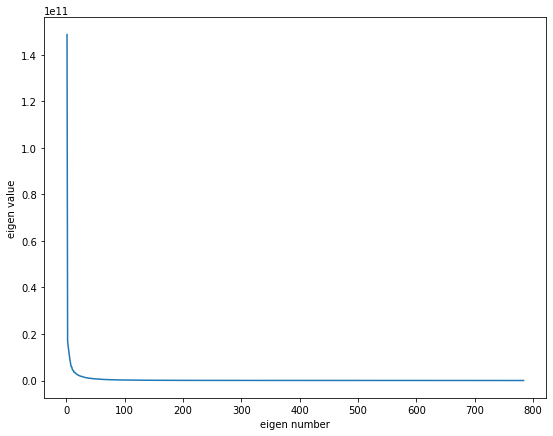

<ipython-input-42-2f9669edece8>:9: RuntimeWarning: divide by zero encountered in log10
  log_w = np.log10(w)
<ipython-input-42-2f9669edece8>:9: RuntimeWarning: invalid value encountered in log10
  log_w = np.log10(w)


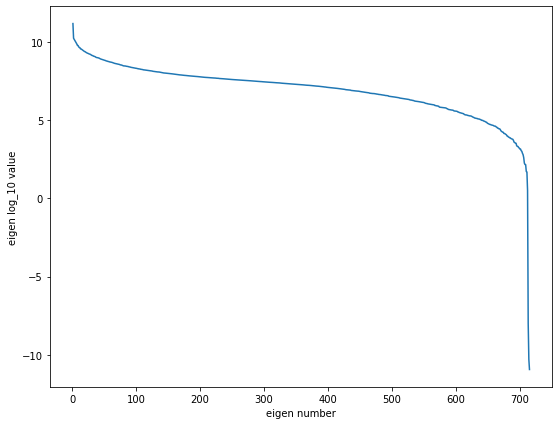

In [42]:
# making graphs of eigen values
counter = np.linspace(1,w.size,w.size)
plt.figure(figsize=(9,7))
sns.lineplot(x = counter, y = w)
plt.xlabel("eigen number")
plt.ylabel("eigen value")
plt.show()
plt.figure(figsize=(9,7))
log_w = np.log10(w)
sns.lineplot(x = counter, y = log_w)
plt.xlabel("eigen number")
plt.ylabel("eigen log_10 value")
plt.show()


# Graphing notions of effective rank


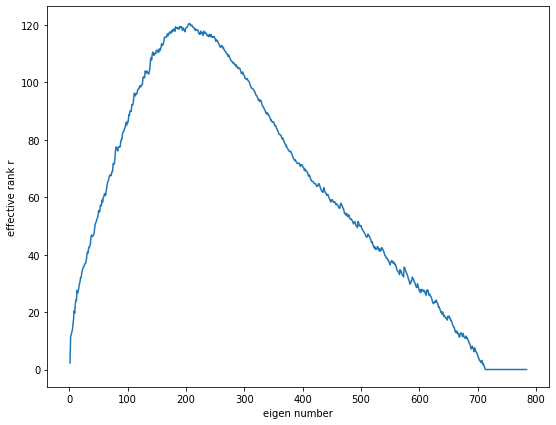

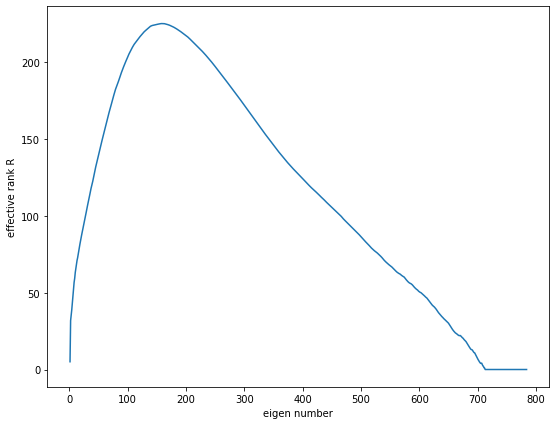

In [52]:
# making graphs of eigen values
counter = np.linspace(1,w.size,w.size)
plt.figure(figsize=(9,7))
sns.lineplot(x = counter, y = effective_rank_1)
plt.xlabel("eigen number")
plt.ylabel("effective rank r")
plt.show()
plt.figure(figsize=(9,7))
sns.lineplot(x = counter, y = effective_rank_2)
plt.xlabel("eigen number")
plt.ylabel("effective rank R")
plt.show()